# DNN with Keras

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.python.client import device_lib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1209135203838414466
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 48693116928
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9854017177451786028
physical_device_desc: "device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [3]:
x_train # 50000 pictures, 32 x 32, rgb

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
img = Image.fromarray(x_train[1], 'RGB')
img.show() # a truck

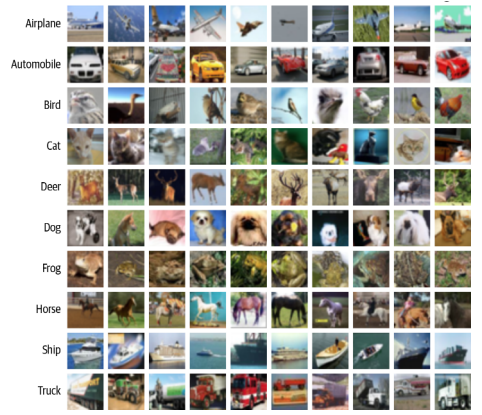

In [6]:
with tf.device('/GPU:0'):
    NUM_CLASSES = 10
    x_train = x_train.astype('float32')/255.0
    x_test = x_test.astype('float32')/255.0
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

Unable to init server: 연결할 수 없습니다: 연결이 거부됨

(eog:24206): Gtk-WARNING **: 11:58:23.919: cannot open display: 


## Building the Model

In [7]:
'''
In usual, we import these packages above as others, but in order to emphasize its usage, I separated them here.
'''

# Option 1: Using Sequential

from tensorflow.keras.models import Sequential # DNN model
from tensorflow.keras.layers import Flatten, Dense # Dense layers

with tf.device('/GPU:0'):
    model = Sequential([
        Dense(200, activation='relu', input_shape=(32,32,3)),
        Flatten(),
        Dense(150, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [8]:
# Option 2: Using Functional API

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Flatten, Dense

# input_layer = Input(shape=(32,32,3))

# x = Flatten()(input_layer) # Flatten() is a function itself. () is for its own parameters. 32 x 32 x 3 -> 3072
# x = Dense(units=200, activation='relu')(x)
# x = Dense(units=150, activation='relu')(x)

# output_layer = Dense(units=10, activation='softmax')(x)

# model = Model(input_layer, output_layer)

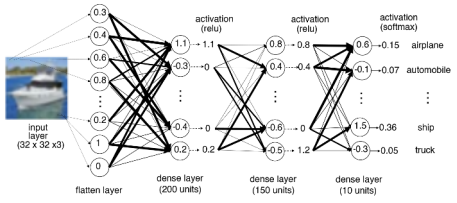

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 200)       800       
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

In [10]:
from tensorflow.keras.optimizers import Adam

with tf.device('/GPU:0'):
    opt = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # pass loss function and optimizer as well as a metric

## Training the Model

In [11]:
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6933 - accuracy: 0.4003
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4617 - accuracy: 0.4837
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3837 - accuracy: 0.5146
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3243 - accuracy: 0.5334
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2785 - accuracy: 0.5519
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2373 - accuracy: 0.5648
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1977 - accuracy: 0.5809
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1624 - accuracy: 0.5922
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1300 - accuracy: 0.6034
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.

## Evaluating the Model

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3954 - accuracy: 0.5197


[1.3954181671142578, 0.5196999907493591]

In [13]:
with tf.device('/GPU:0'):
    CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    preds = model.predict(x_test)
    preds_single = CLASSES[np.argmax(preds, axis=-1)] # axis=-1 tells the function to collapse the array over the last dimension(the classes dimension)
    actual_single = CLASSES[np.argmax(y_test, axis=-1)]

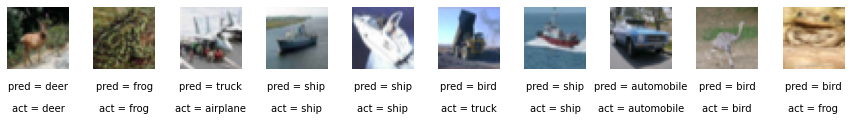

In [14]:
n_to_show = 10
indices =  np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

## Improving the Model with CNN

In [16]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input
from tensorflow.keras import Model

with tf.device('/GPU:0'):
    input_layer = Input(shape=(32,32,3))

    conv_layer_1 = Conv2D(filters=10, kernel_size=(4,4), strides=2, padding='same')(input_layer)
    conv_layer_2 = Conv2D(filters=20, kernel_size=(3,3), strides=2, padding='same')(conv_layer_1)
    flatten_layer = Flatten()(conv_layer_2)

    output_layer = Dense(units=10, activation='softmax')(flatten_layer)
    model = Model(input_layer, output_layer)

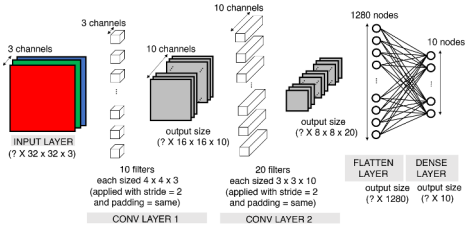

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import Adam

with tf.device('/GPU:0'):
    opt = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # pass loss function and optimizer as well as a metric

In [19]:
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, batch_size=16, epochs=10, shuffle=True)

Epoch 1/10
3125/3125 [==============================] - 10s 3ms/step - loss: 1.8214 - accuracy: 0.3645
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7294 - accuracy: 0.4059
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7133 - accuracy: 0.4162
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7019 - accuracy: 0.4209
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.6953 - accuracy: 0.4246
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 1.6878 - accuracy: 0.4243
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.6827 - accuracy: 0.4253
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.6774 - accuracy: 0.4271
Epoch 9/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.6724 - accuracy: 0.4307
Epoch 10/10
3125/3125 [==============================] - 10s 3ms/step - loss: 1.

In [20]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 5ms/step - loss: 1.7217 - accuracy: 0.4067


[1.7217411994934082, 0.4066999852657318]

## Batch Normalization

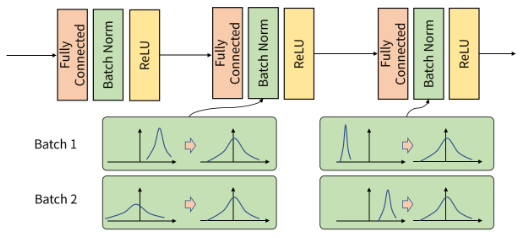

### Training

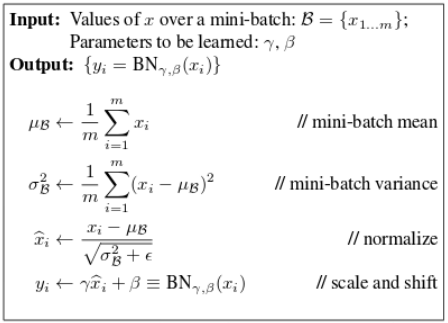

### Inference

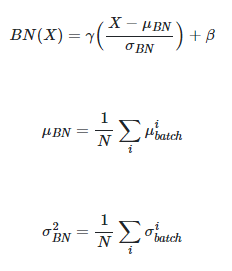

## Dropout Layers

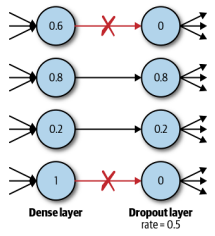

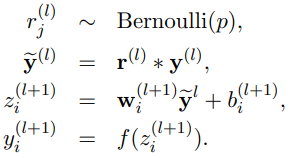

In [21]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dropout, Activation

with tf.device('/GPU:0'):
    input_layer = Input((32,32,3))

    x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Dropout(rate = 0.5)(x)
    x = Dense(NUM_CLASSES)(x)

    output_layer = Activation('softmax')(x)
    model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

In [23]:
from tensorflow.keras.optimizers import Adam

with tf.device('/GPU:0'):
    opt = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # pass loss function and optimizer as well as a metric

In [24]:
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, batch_size=16, epochs=10, shuffle=True)

Epoch 1/10
3125/3125 [==============================] - 20s 6ms/step - loss: 1.5431 - accuracy: 0.4588
Epoch 2/10
3125/3125 [==============================] - 20s 6ms/step - loss: 1.1376 - accuracy: 0.6039
Epoch 3/10
3125/3125 [==============================] - 20s 6ms/step - loss: 1.0118 - accuracy: 0.6480
Epoch 4/10
3125/3125 [==============================] - 20s 6ms/step - loss: 0.9303 - accuracy: 0.6765
Epoch 5/10
3125/3125 [==============================] - 20s 6ms/step - loss: 0.8707 - accuracy: 0.6979
Epoch 6/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.8206 - accuracy: 0.7138
Epoch 7/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.7853 - accuracy: 0.7262
Epoch 8/10
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7477 - accuracy: 0.7401
Epoch 9/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.7143 - accuracy: 0.7534
Epoch 10/10
3125/3125 [==============================] - 20s 6ms/step - l

In [25]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 7ms/step - loss: 0.8379 - accuracy: 0.7175


[0.837923526763916, 0.7174999713897705]